In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
import pandas as pd

os.chdir(os.path.abspath('..'))

In [2]:
from dinov2.data.datasets.hyperview import HyperviewWrapper

data_dir = '/data/panopticon/datasets/hyperview/train_data'
labels_path = '/data/panopticon/datasets/hyperview/train_gt.csv'

hyp = HyperviewWrapper(data_dir, labels_path)

/home/ando/PanOpticOn/dinov2/data/datasets/hyperview.py:80: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.chn_ids = torch.tensor(extract_wavemus(load_ds_cfg(self.ds_name)), dtype=torch.long)


(150, 138, 137)


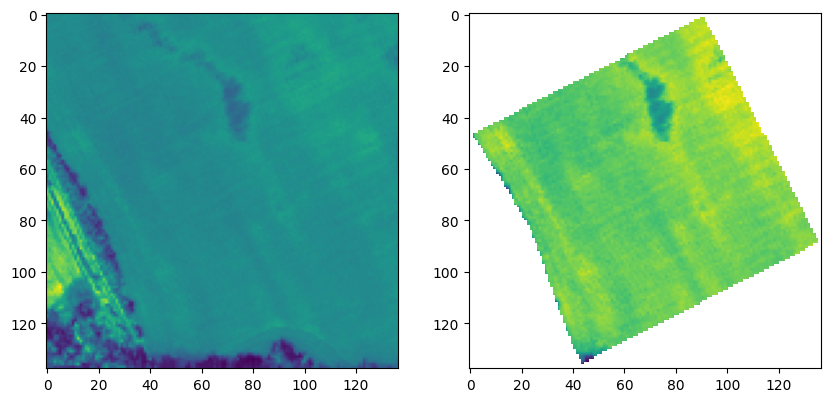

In [3]:
import numpy as np
import matplotlib.pyplot as plt
path = data_dir + '/1570.npz'

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
band_id = 100


with np.load(path) as npz:
    arr = np.ma.MaskedArray(**npz)

print(arr.shape)

axs[0].imshow(arr[band_id,:,:].data)
axs[1].imshow(arr[band_id,:,:])
plt.show()

In [4]:
sample, label = hyp[-1]
sample

{'imgs': tensor([[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]],
 
         [[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]],
 
         [[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]],
 
         ...,
 
         [[-1., -1., -1.,  ..., -1., -1., -1.],
          

In [6]:
sample['imgs'].max(), sample['imgs'].min(), sample['imgs'].mean(), sample['imgs'].std()

(tensor(1886.), tensor(-1.), tensor(532.2687), tensor(555.5543))

In [7]:
sample['chn_ids'].shape

torch.Size([150])

In [10]:
import yaml

# Define the initial content of the YAML file
data = {
    'task_id': 'multilabelregression',
    'num_variables': 4,
    'gsd': 2,
    'img_size': 'variable',
    'bands': [{'id': f'intuition/B{str(i).zfill(3)}'} for i in range(1, 151)],
    'modality': 'optical'  # sar, dem, lc
}

# Write the content to the YAML file
with open('hyperview.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False)